# Uber Dataset Analysis

### Objective:
The goal of this project is to analyze Uber ride data to gain insights into:
- Trip categories (Business vs Personal)
- Popular trip purposes
- Temporal patterns (days, hours, months)
- Trip distance, duration, and speed
- Most frequent routes
- Relationship between miles and duration

### Dataset:
The dataset contains Uber rides with details such as:
- Start and End Date
- Category (Business/Personal)
- Start Location, Stop Location
- Purpose of trip
- Miles traveled

In [2]:
# importing python libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#importing CSV file
df = pd.read_csv(r"C:\Users\HP\Downloads\UberDataset.csv")

In [4]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01/01/16 21:11,01/01/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01/02/16 1:25,01/02/16 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01/02/16 20:25,01/02/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01/05/16 17:31,01/05/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01/06/16 14:42,01/06/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.shape

(1156, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
#check for null values
pd.isnull(df).sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
# Check duplicate rows
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
# Summary stats of MILES
print("\nMILES column statistics:\n", df['MILES'].describe())


MILES column statistics:
 count     1155.000000
mean        21.125108
std        359.454497
min          0.500000
25%          2.900000
50%          6.000000
75%         10.400000
max      12204.700000
Name: MILES, dtype: float64


In [12]:
# Convert START_DATE and END_DATE to datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE']   = pd.to_datetime(df['END_DATE'], errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_82220\430811915.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_82220\430811915.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['END_DATE']   = pd.to_datetime(df['END_DATE'], errors='coerce')


In [13]:
# Drop rows with missing START_DATE
df = df.dropna(subset=['START_DATE']).reset_index(drop=True)

In [14]:
# Fill missing categorical values with 'Unknown'
df['CATEGORY'] = df['CATEGORY'].fillna("Unknown")
df['START']    = df['START'].fillna("Unknown")
df['STOP']     = df['STOP'].fillna("Unknown")
df['PURPOSE']  = df['PURPOSE'].fillna("Unknown")

In [15]:
# Check range of MILES
print("Min miles:", df['MILES'].min(), "Max miles:", df['MILES'].max())

Min miles: 0.5 Max miles: 310.3


In [16]:
# Extract new date/time features
df['DATE']  = df['START_DATE'].dt.date
df['DAY']   = df['START_DATE'].dt.day_name()
df['MONTH'] = df['START_DATE'].dt.month_name()
df['HOUR']  = df['START_DATE'].dt.hour

In [17]:
# Calculate trip duration in minutes
df['DURATION_MIN'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

In [18]:
# Calculate trip speed in miles per hour
df['SPEED_MPH'] = np.nan
mask = df['DURATION_MIN'] > 0
df.loc[mask, 'SPEED_MPH'] = df.loc[mask, 'MILES'] / (df.loc[mask, 'DURATION_MIN'] / 60)

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,DAY,MONTH,HOUR,DURATION_MIN,SPEED_MPH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,Friday,January,21,6.0,51.000000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,Saturday,January,1,12.0,25.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,Saturday,January,20,13.0,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,Tuesday,January,17,14.0,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,Wednesday,January,14,67.0,57.044776


In [19]:
print("Shape:", df.shape)

Shape: (1154, 13)


In [20]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE         0
DATE            0
DAY             0
MONTH           0
HOUR            0
DURATION_MIN    0
SPEED_MPH       4
dtype: int64


In [21]:
print("\nCATEGORY distribution:\n", df['CATEGORY'].value_counts())


CATEGORY distribution:
 CATEGORY
Business    1077
Personal      77
Name: count, dtype: int64


In [22]:
print("\nTop PURPOSEs:\n", df['PURPOSE'].value_counts().head(10))


Top PURPOSEs:
 PURPOSE
Unknown            502
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Name: count, dtype: int64


In [23]:
print("\nAverage Miles:", round(df['MILES'].mean(), 2))


Average Miles: 10.57


In [24]:
print("Average Duration (min):", round(df['DURATION_MIN'].mean(), 2))

Average Duration (min): 23.24


In [25]:
print("Average Speed (mph):", round(df['SPEED_MPH'].mean(), 2))

Average Speed (mph): 26.81


EDA Visualizations

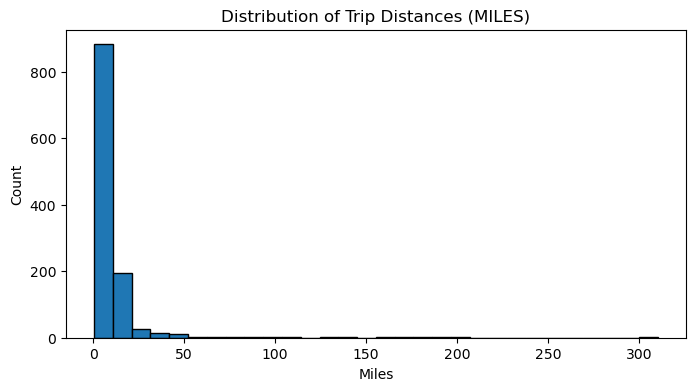

In [27]:
#Distribution of trip distance
plt.figure(figsize=(8,4))
plt.hist(df['MILES'], bins=30, edgecolor='black')
plt.title("Distribution of Trip Distances (MILES)")
plt.xlabel("Miles")
plt.ylabel("Count")
plt.show()

- Most trips are of short distance between 0 to 20 miles
- We can suggest that Uber is mostly used for local travel, not long distance

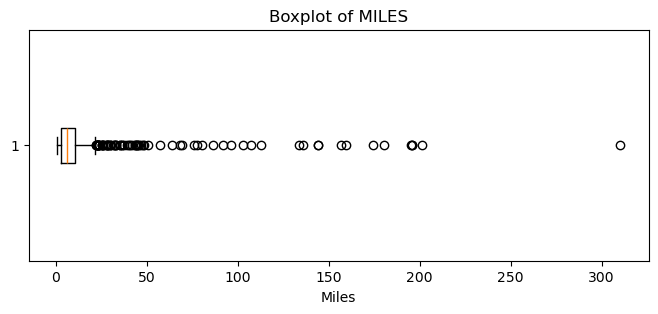

In [29]:
#Boxplot of Miles
plt.figure(figsize=(8,3))
plt.boxplot(df['MILES'], vert=False)
plt.title("Boxplot of MILES")
plt.xlabel("Miles")
plt.show()

- The median Trip distance is relatively low
- Very few trips are visible as outliers points far from box
- This confirms that most trips are short, but some exceptional long rides exist.

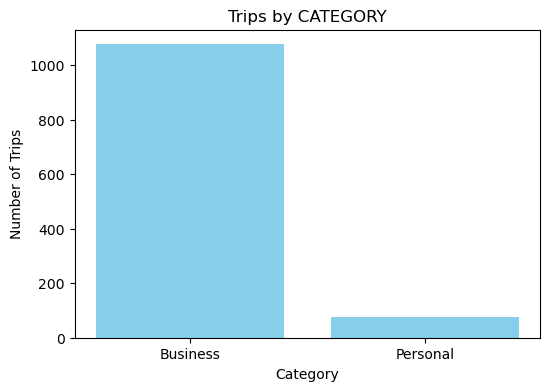

In [31]:
#Trip counts by Category
category_counts = df['CATEGORY'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(category_counts.index, category_counts.values, color="skyblue")
plt.title("Trips by CATEGORY")
plt.xlabel("Category")
plt.ylabel("Number of Trips")
plt.show()

- The dataset is dominated by Business trips, with very few Personal trips
- This suggests the data was likely collected for work-related travel analysis

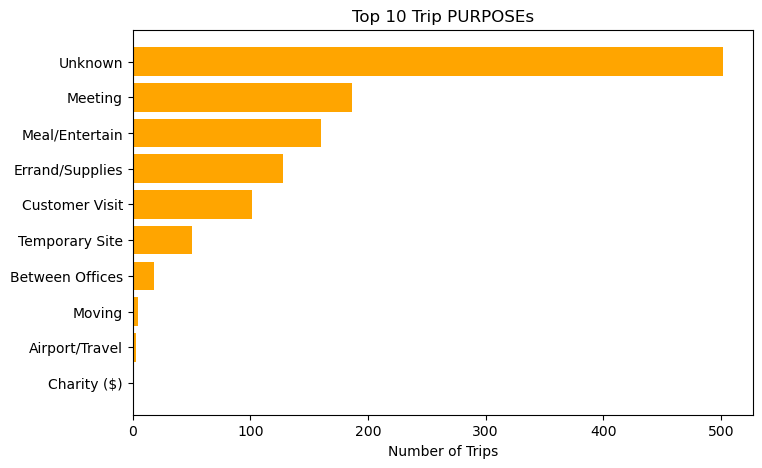

In [33]:
#Top 10 trip purposes
top_purposes = df['PURPOSE'].value_counts().head(10)
plt.figure(figsize=(8,5))
plt.barh(top_purposes.index[::-1], top_purposes.values[::-1], color="orange")
plt.title("Top 10 Trip PURPOSEs")
plt.xlabel("Number of Trips")
plt.show()

In [34]:
# Remove "Unknown" purposes
df_purpose = df[df['PURPOSE'] != "Unknown"]

purpose_counts = df_purpose['PURPOSE'].value_counts()

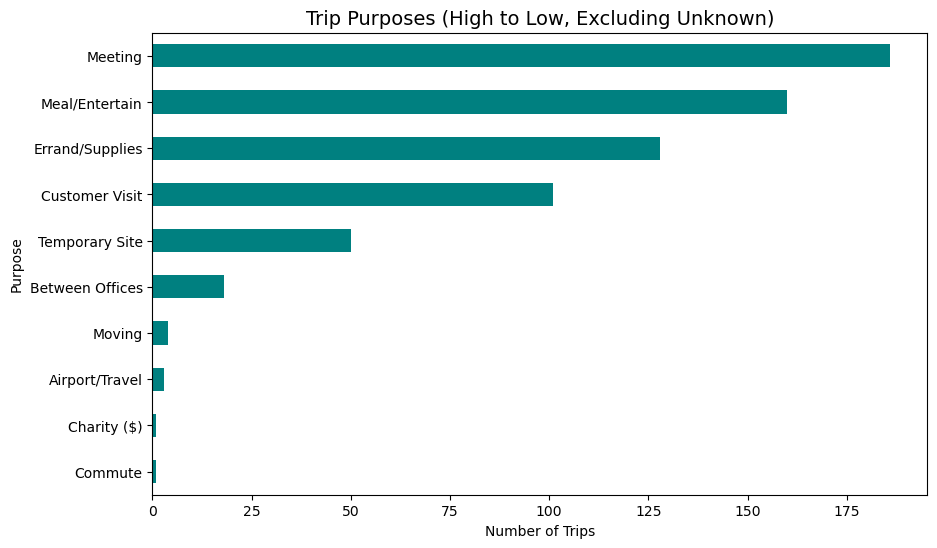

In [35]:
# Plot
plt.figure(figsize=(10,6))
purpose_counts.plot(kind='barh', color='teal')

plt.title("Trip Purposes (High to Low, Excluding Unknown)", fontsize=14)
plt.xlabel("Number of Trips")
plt.ylabel("Purpose")
plt.gca().invert_yaxis()  # highest on top
plt.show()

- Top purposes are Meetings, Meals/Entertainment, Errands, Customer Visits.
- This indicates Uber is used heavily for professional meetings and work tasks.

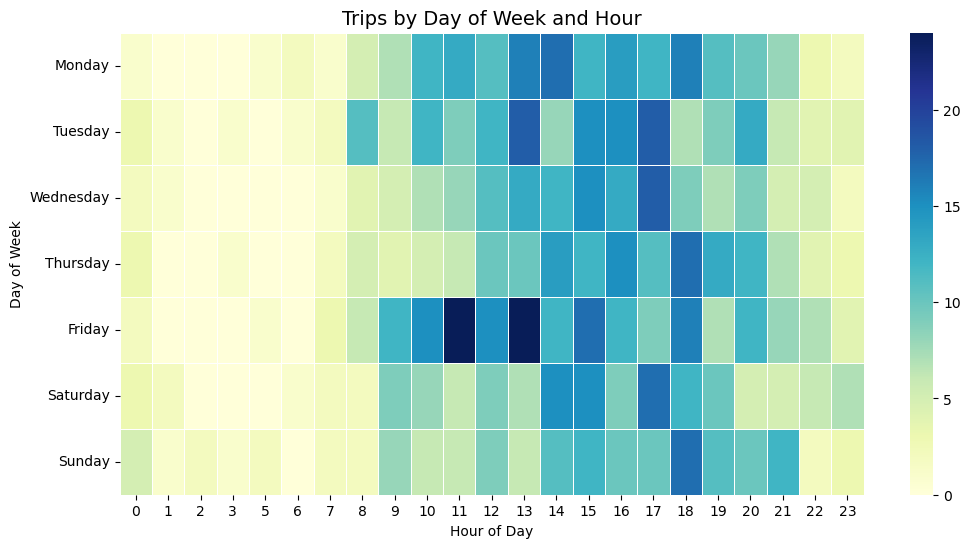

In [37]:
# Count of trips for each Day vs Hour
pivot = pd.crosstab(df['DAY'], df['HOUR'])

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot = pivot.reindex(days_order)

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5, annot=False)

plt.title("Trips by Day of Week and Hour", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

- Trips are most frequent on weekdays (Mon–Fri) compared to weekends.
- Peak hours are afternoon (12) and evening (4–6 PM), aligning with office travel.
- Confirms dataset is strongly tied to work commute patterns.

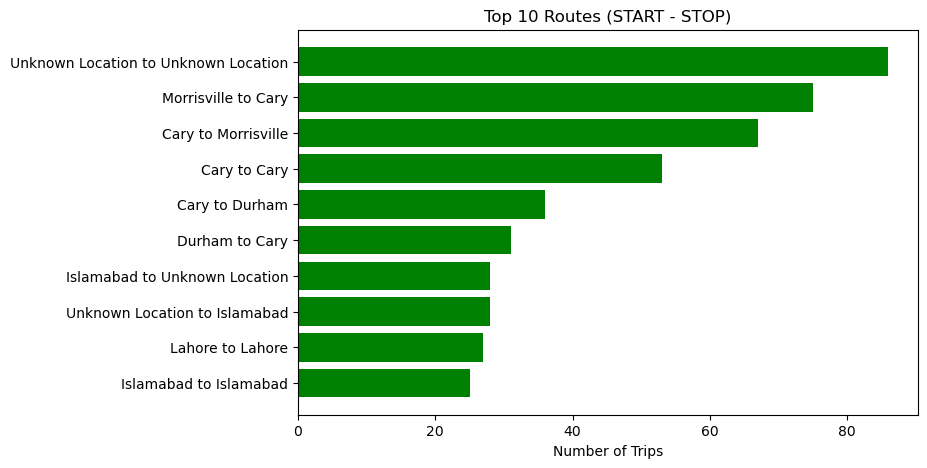

In [39]:
#Top 10 routes
routes = df['START'].astype(str).str.strip() + " to " + df['STOP'].astype(str).str.strip()
top_routes = routes.value_counts().head(10)

plt.figure(figsize=(8,5))
plt.barh(top_routes.index[::-1], top_routes.values[::-1], color="green")
plt.title("Top 10 Routes (START - STOP)")
plt.xlabel("Number of Trips")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_82220\3021678920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette="Blues_r")


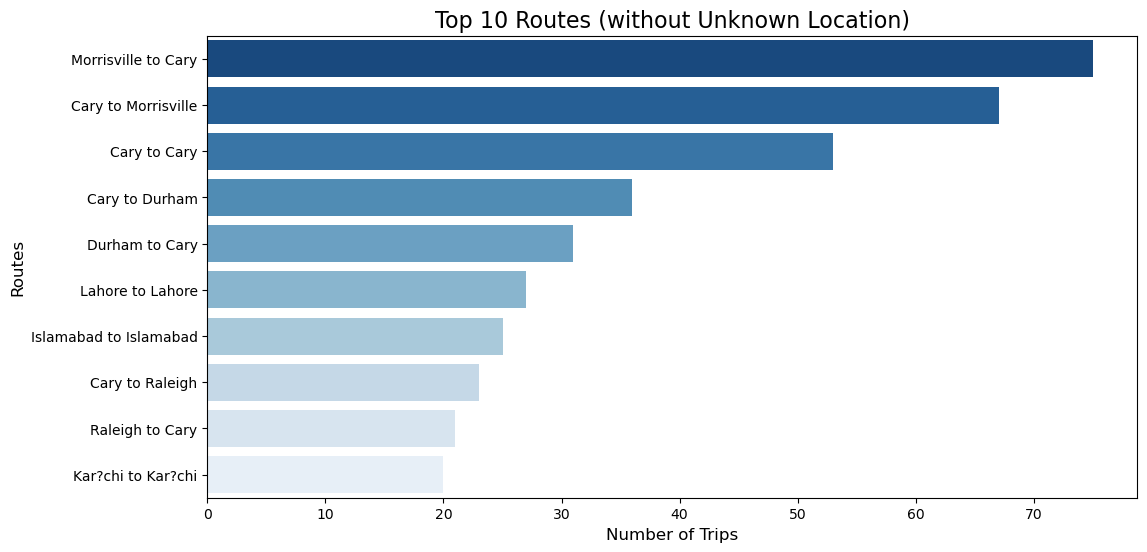

In [41]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_routes.values, y=top_routes.index, palette="Blues_r")

plt.title("Top 10 Routes (without Unknown Location)", fontsize=16)
plt.xlabel("Number of Trips", fontsize=12)
plt.ylabel("Routes", fontsize=12)
plt.show()

- Some routes apperar frequently
- Indicating regular travel patters or repeated clients

C:\Users\HP\AppData\Local\Temp\ipykernel_82220\3944336990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_routes['ROUTE'] = df_routes['START'] + " to " + df_routes['STOP']
C:\Users\HP\AppData\Local\Temp\ipykernel_82220\3944336990.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=route_counts.values, y=route_counts.index, palette="Blues_r", ax=axes[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_82220\3944336990.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same 

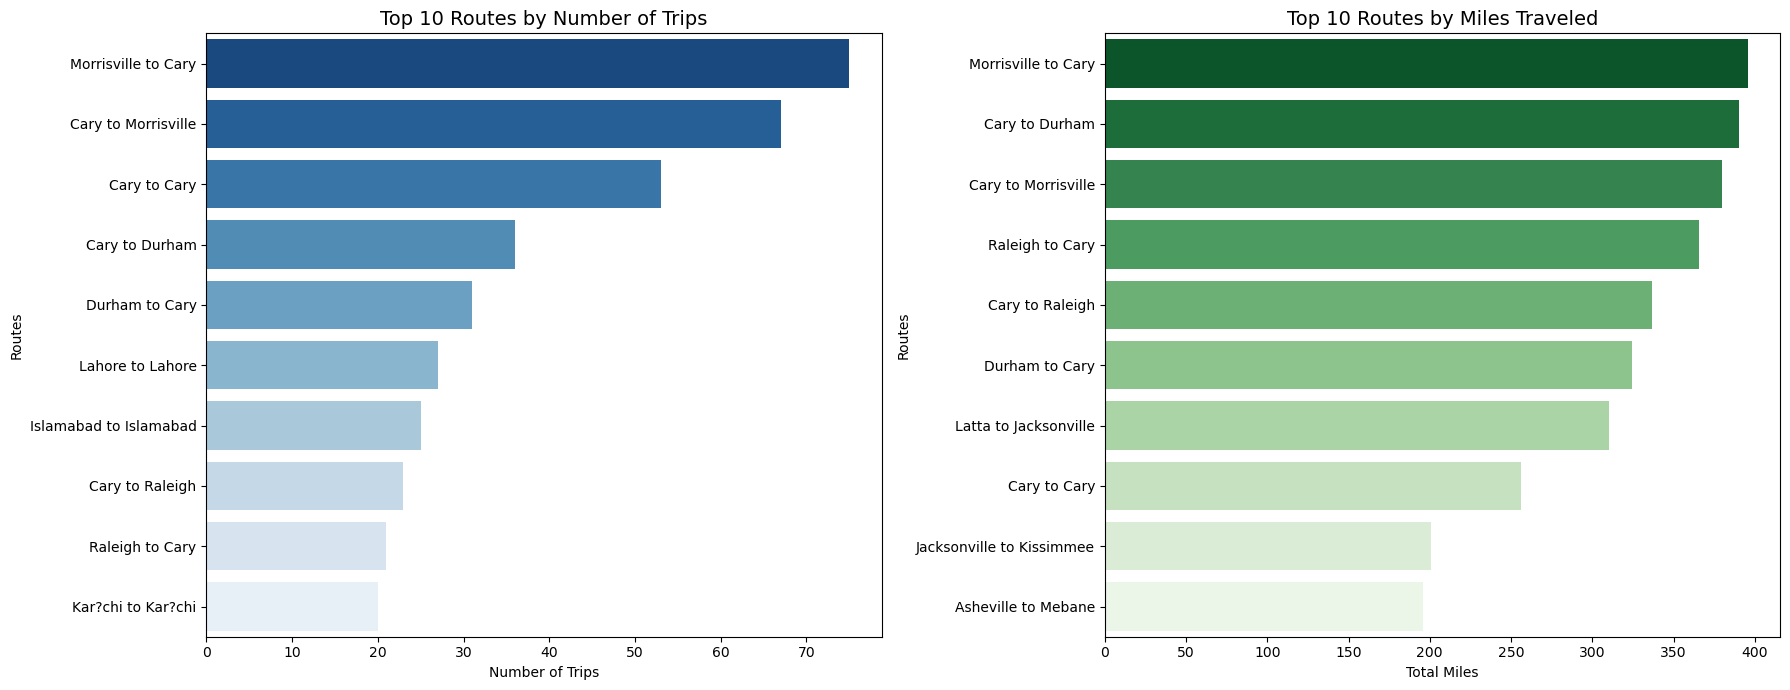

In [43]:
#Comparison of "Routes" abd "Miles"
df_routes = df[(df['START'] != "Unknown Location") & (df['STOP'] != "Unknown Location")]

df_routes['ROUTE'] = df_routes['START'] + " to " + df_routes['STOP']

#Top 10 by Number of Trips
route_counts = df_routes['ROUTE'].value_counts().head(10)

#Top 10 by Miles
route_miles = df_routes.groupby('ROUTE')['MILES'].sum().sort_values(ascending=False).head(10)

#plot
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

#Trip Counts
sns.barplot(x=route_counts.values, y=route_counts.index, palette="Blues_r", ax=axes[0])
axes[0].set_title("Top 10 Routes by Number of Trips", fontsize=14)
axes[0].set_xlabel("Number of Trips")
axes[0].set_ylabel("Routes")

#Total Miles
sns.barplot(x=route_miles.values, y=route_miles.index, palette="Greens_r", ax=axes[1])
axes[1].set_title("Top 10 Routes by Miles Traveled", fontsize=14)
axes[1].set_xlabel("Total Miles")
axes[1].set_ylabel("Routes")

plt.tight_layout()
plt.show()

- The left chart shows the most frequent routes (by number of trips).
- The right chart shows the routes that account for the most distance traveled (miles).
- Comparing them:
  - Some routes are short but frequent (commuting patterns).
  - Others are less frequent but long (long-distance business trips).

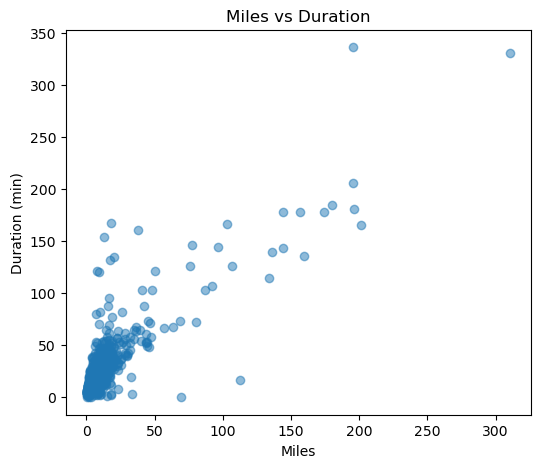

In [45]:
#Scatter Plot
plt.figure(figsize=(6,5))
plt.scatter(df['MILES'], df['DURATION_MIN'], alpha=0.5)
plt.title("Miles vs Duration")
plt.xlabel("Miles")
plt.ylabel("Duration (min)")
plt.show()


- Clear positive correlation: longer distances generally take longer time.
- However, some points show short distances but high duration: likely due to traffic congestion.

In [47]:
#Correlation Matrix
numeric_cols = ['MILES', 'DURATION_MIN', 'SPEED_MPH']
print("Correlation Matrix:\n", df[numeric_cols].corr())

Correlation Matrix:
                  MILES  DURATION_MIN  SPEED_MPH
MILES         1.000000      0.842266   0.195398
DURATION_MIN  0.842266      1.000000   0.005974
SPEED_MPH     0.195398      0.005974   1.000000


# Insights & Conclusion

- Majority of trips are **Business (93%)**, with very few personal trips.
- The most common **trip purpose** is "Meeting" and "Meal/Entertainment".
- Trip **miles** are mostly short (0–20 miles), but a few long trips create outliers.
- Trips are more frequent during **working hours** (8 AM – 6 PM).
- Some **routes repeat frequently**, showing regular travel patterns.
- Trip **miles and duration are positively correlated** (longer trips take more time).
- Average **speed is reasonable**, indicating normal urban travel.

In [49]:
df.to_csv(r"C:\Users\HP\Downloads\UberDataset_Cleaned.csv", index=False)
print("Cleaned dataset saved as UberDataset_Cleaned.csv")

Cleaned dataset saved as UberDataset_Cleaned.csv
